<a href="https://colab.research.google.com/github/sarahajbane/colab_workbook_templates/blob/main/EDA_Visualizations_Key_Differences_%26_Advanced_Topics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here you have a **Key differences** table

It's done using python, so you can have a look, it'll help you learn how to make a table in a notebook, used often in scientific articles (or your final projects)
This notebook contains more advanced python code, feel free to explore it and try to understand it, but don't get overwhelmed if you can't follow it. If that is the case, just run it and study the output table which is the summary of today's theory lesson.

In [2]:
!pip install squarify

In [3]:
# First, we import what we need
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from IPython.core.display import display, HTML # for display options
from io import BytesIO #it helps us with visual options
import base64 #it helps us with visual options
import squarify  # Required for treemap visualization yo might need to install it using  --> !pip install squarify

In [4]:
# Then, we generate some sample data (for the example's purpose only, usually you'll use real data)
np.random.seed(42)
data = pd.DataFrame({
    "Category": np.random.choice(["A", "B", "C"], 100),
    "Value1": np.random.normal(50, 10, 100),
    "Value2": np.random.normal(30, 5, 100),
    "Group": np.random.choice(["G1", "G2"], 100)
})


In [6]:
# We can build a helper function to save the plots into the desired format
def plot_to_base64(plot_func):
    buf = BytesIO()
    plot_func()
    plt.savefig(buf, format='png', bbox_inches='tight')
    plt.close()
    buf.seek(0)
    encoded = base64.b64encode(buf.read()).decode('utf-8')
    return f'<img src="data:image/png;base64,{encoded}" width="200">'

In [7]:
# Then we can go ahead and generate the visualizations and embed them  as base64 images

visuals = {
    "Histogram": plot_to_base64(lambda: sns.histplot(data["Value1"], kde=True, bins=10, color="blue")),
    "Scatterplot": plot_to_base64(lambda: sns.scatterplot(x="Value1", y="Value2", data=data, hue="Category")),
    "Swarm Plot": plot_to_base64(lambda: sns.swarmplot(x="Category", y="Value1", data=data)),
    "Violin Plot": plot_to_base64(lambda: sns.violinplot(x="Category", y="Value1", data=data)),
    "Box Plot": plot_to_base64(lambda: sns.boxplot(x="Category", y="Value1", data=data)),
    "Bar Chart": plot_to_base64(lambda: data['Category'].value_counts().plot(kind="bar", color="green")),
    "Line Plot": plot_to_base64(lambda: data.groupby(data.index)["Value1"].mean().plot(kind="line")),
    "Density Plot (KDE)": plot_to_base64(lambda: sns.kdeplot(data["Value1"], color="purple", fill=True))
}


In [8]:
# We prepare the table all the information we want to put in it with a dictionary structure and we include the embeded images
table_data = {
    "Visualization Type": [
        "Histogram", "Scatterplot", "Swarm Plot", "Violin Plot",
        "Box Plot", "Bar Chart", "Line Plot", "Density Plot (KDE)"
    ],
    "Purpose": [
        "Shows the distribution of a single variable.",
        "Displays the relationship between two numerical variables.",
        "Shows the distribution of a categorical variable against a numerical variable.",
        "Combines box plot and kernel density estimate (KDE).",
        "Summarizes distribution of data using quartiles.",
        "Compares categorical data using bars.",
        "Displays trends over time or ordered data.",
        "Displays probability density of a numerical variable."
    ],
    "Data Type": [
        "Numerical", "Numerical vs Numerical", "Categorical vs Numerical",
        "Categorical vs Numerical", "Categorical vs Numerical",
        "Categorical", "Numerical (time-series or sequential)", "Numerical"
    ],
    "Key Characteristics": [
        "- Groups data into bins<br>- Displays frequency of values in each bin.",
        "- Each point represents an observation.<br>- Axes represent variables being compared.",
        "- Each data point is positioned to avoid overlap.<br>- Highlights data density.",
        "- Shows the distribution and probability density of data for each category.<br>- Includes quartiles and median (like a box plot).",
        "- Displays median, interquartile range (IQR), and potential outliers.<br>- Simple and compact representation of spread.",
        "- Height or length of bars represents the value or frequency.<br>- Can be horizontal or vertical.",
        "- Points connected by lines.<br>- Highlights patterns, trends, or cycles in data.",
        "- Smooth curve based on the frequency of values.<br>- Can be overlaid for comparison of distributions."
    ],
    "Best For": [
        "- Understanding the shape (e.g., normality, skewness) of data<br>- Detecting outliers.",
        "- Visualizing correlations or trends between two variables.<br>- Identifying clusters or outliers.",
        "- Visualizing spread and density of data within categories.",
        "- Comparing distributions across multiple categories.<br>- Understanding data spread and symmetry.",
        "- Comparing data spread across categories.<br>- Identifying outliers.",
        "- Comparing sizes of categories.<br>- Understanding frequency distribution for categorical variables.",
        "- Analyzing time-series data.<br>- Showing changes over time.",
        "- Visualizing smooth distribution patterns.<br>- Comparing multiple distributions."
    ],
    "Example": [
        visuals["Histogram"],
        visuals["Scatterplot"],
        visuals["Swarm Plot"],
        visuals["Violin Plot"],
        visuals["Box Plot"],
        visuals["Bar Chart"],
        visuals["Line Plot"],
        visuals["Density Plot (KDE)"]
    ]
}


Visualization Type,Purpose,Data Type,Key Characteristics,Best For,Example
Histogram,Shows the distribution of a single variable.,Numerical,- Groups data into bins- Displays frequency of values in each bin.,"- Understanding the shape (e.g., normality, skewness) of data- Detecting outliers.",
Scatterplot,Displays the relationship between two numerical variables.,Numerical vs Numerical,- Each point represents an observation.- Axes represent variables being compared.,- Visualizing correlations or trends between two variables.- Identifying clusters or outliers.,
Swarm Plot,Shows the distribution of a categorical variable against a numerical variable.,Categorical vs Numerical,- Each data point is positioned to avoid overlap.- Highlights data density.,- Visualizing spread and density of data within categories.,
Violin Plot,Combines box plot and kernel density estimate (KDE).,Categorical vs Numerical,- Shows the distribution and probability density of data for each category.- Includes quartiles and median (like a box plot).,- Comparing distributions across multiple categories.- Understanding data spread and symmetry.,
Box Plot,Summarizes distribution of data using quartiles.,Categorical vs Numerical,"- Displays median, interquartile range (IQR), and potential outliers.- Simple and compact representation of spread.",- Comparing data spread across categories.- Identifying outliers.,
Bar Chart,Compares categorical data using bars.,Categorical,- Height or length of bars represents the value or frequency.- Can be horizontal or vertical.,- Comparing sizes of categories.- Understanding frequency distribution for categorical variables.,
Line Plot,Displays trends over time or ordered data.,Numerical (time-series or sequential),"- Points connected by lines.- Highlights patterns, trends, or cycles in data.",- Analyzing time-series data.- Showing changes over time.,
Density Plot (KDE),Displays probability density of a numerical variable.,Numerical,- Smooth curve based on the frequency of values.- Can be overlaid for comparison of distributions.,- Visualizing smooth distribution patterns.- Comparing multiple distributions.,

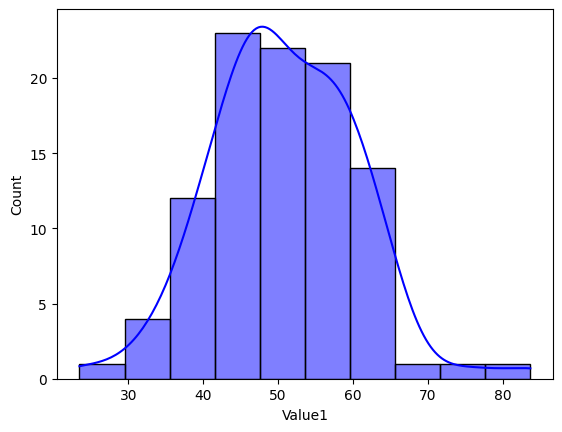
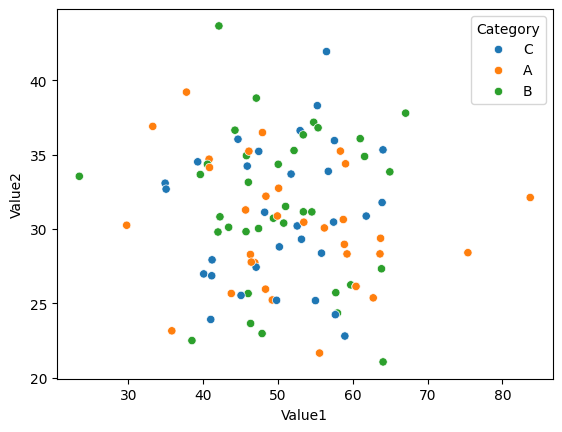
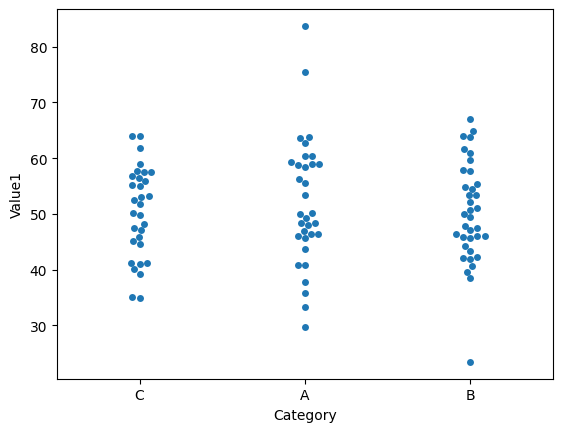
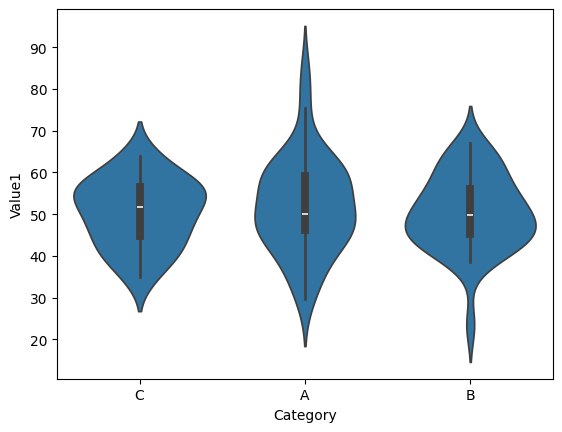
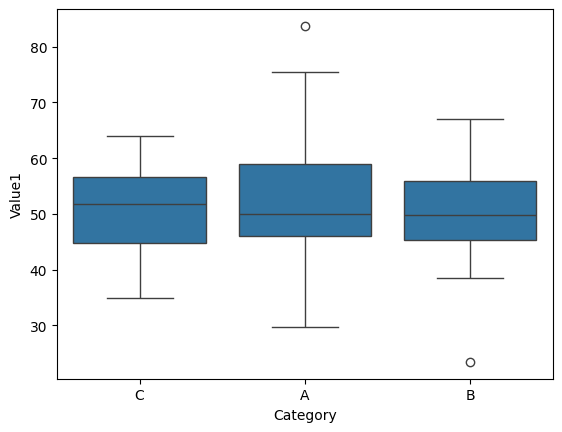
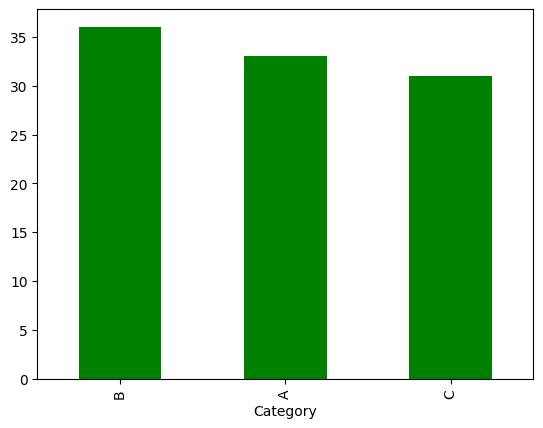
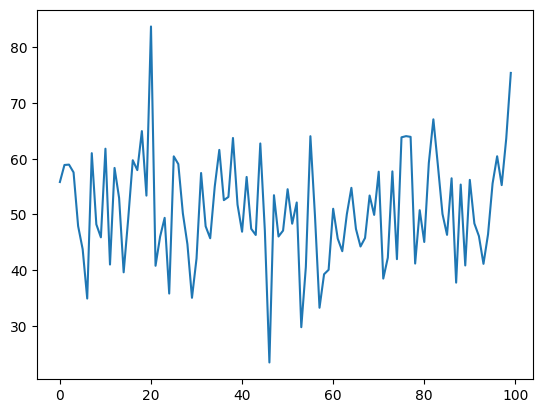
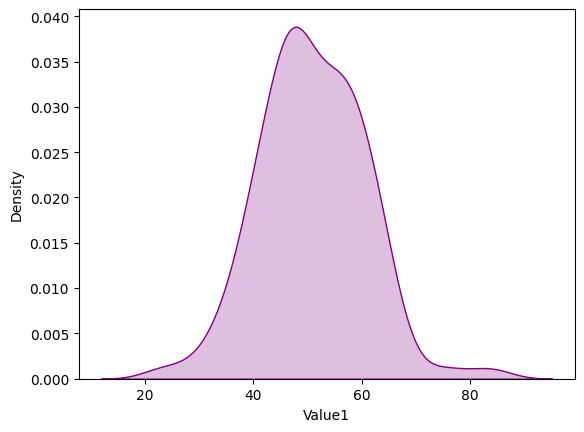

In [9]:
# And finally, we create the DataFrame and ender the table with embedded images
eda_table = pd.DataFrame(table_data)

HTML(eda_table.to_html(escape=False, index=False))

And here, some more advances visualizations for those in need of more materials

Visualization Type,Purpose,Data Type,Key Characteristics,Best For,Example
Heatmap,Displays a matrix of values using color intensity to represent magnitude.,Numerical vs Numerical,- Matrix format with color intensity.- Highlights patterns and relationships.,- Identifying correlations or patterns between variables.- Spotting relationships at a glance.,
Pairplot,Shows pairwise relationships between numerical variables.,Numerical,- Scatterplots and histograms for all pairs of variables.- Includes KDE on diagonals.,- Exploring pairwise relationships in multidimensional data.- Cluster detection.,
Stacked Bar Chart,Displays proportions of subcategories within categories as stacked bars.,Categorical vs Categorical,- Stacked bars show proportions of subcategories.- Can compare across main categories.,- Visualizing proportions of subcategories within each category.,
Treemap,Represents hierarchical or grouped data using bar heights.,Categorical vs Numerical,- Uses bar heights to represent proportions.- Simple alternative to a treemap.,- Showing hierarchical or grouped data proportions in a compact form.,
Bubble Chart,Adds a third variable to a scatterplot by encoding it as the size of the points.,Numerical vs Numerical vs Size,- Adds a third dimension to scatterplots via bubble size.- Supports transparency for overlap.,- Exploring three-variable relationships in numerical data.- Highlighting outliers.,
Radar Chart,Compares multiple variables for multiple categories on a circular graph.,Numerical vs Numerical,- Circular chart comparing variables.- Best for small sets of attributes or metrics.,- Comparing multiple variables across a few categories.- Showing relative strengths.,
ECDF Plot,Shows the cumulative distribution of a numerical variable.,Numerical,- Smooth cumulative curve showing data distribution.,- Understanding data spread and comparing datasets.,

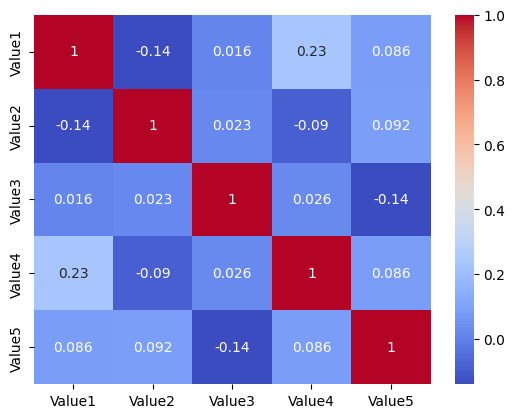
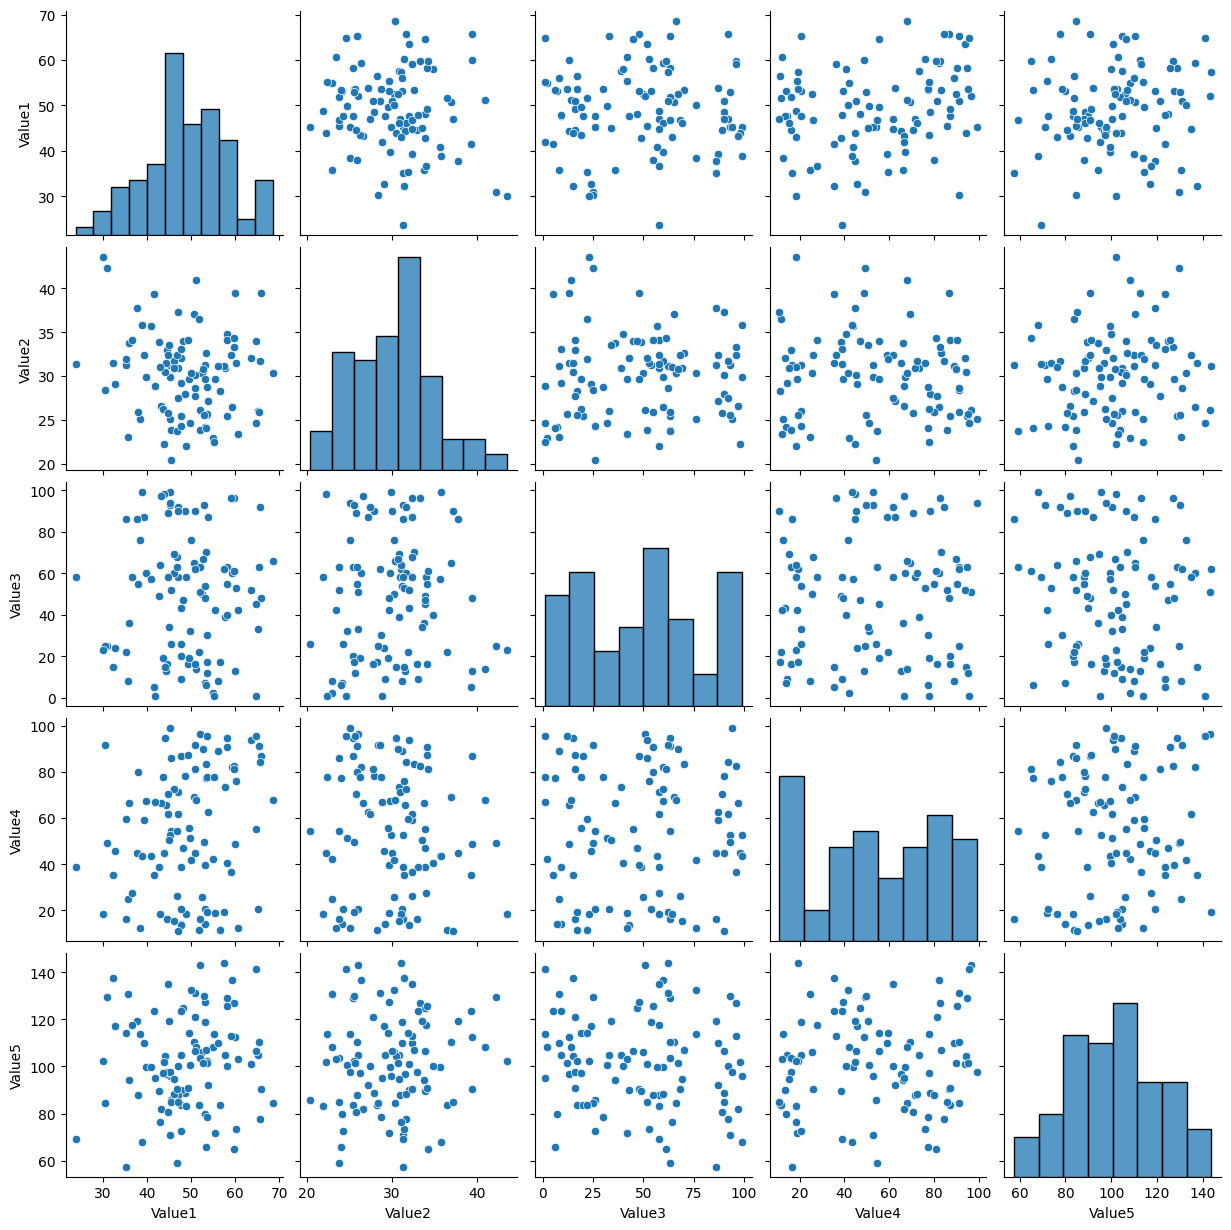
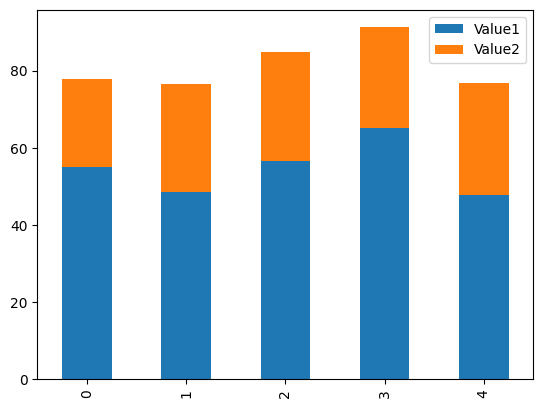
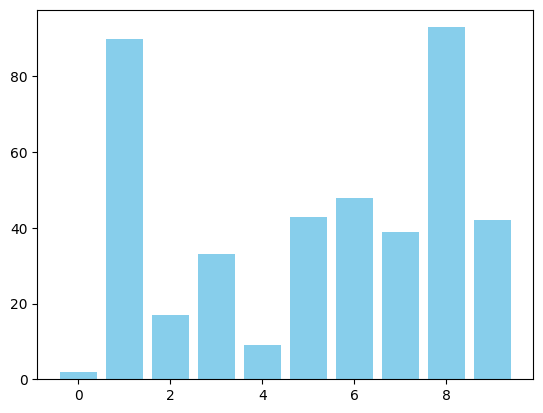
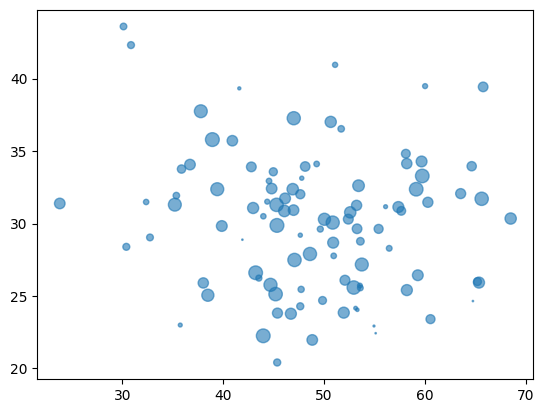
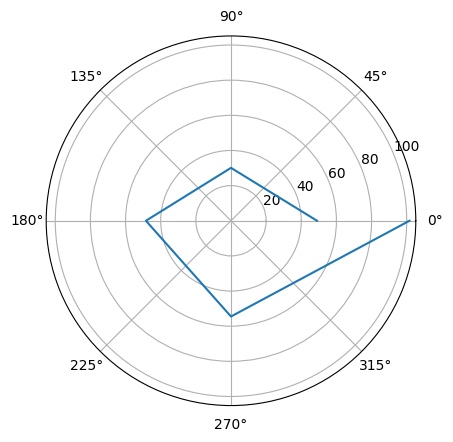
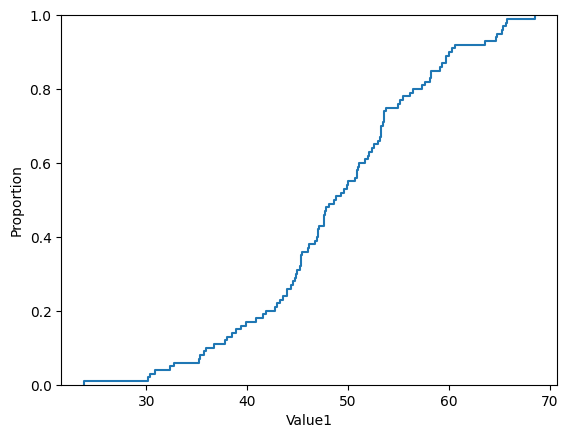

In [10]:
# We generate numerical-only sample data this time
np.random.seed(42)
data = pd.DataFrame({
    "Value1": np.random.normal(50, 10, 100),
    "Value2": np.random.normal(30, 5, 100),
    "Value3": np.random.randint(1, 100, 100),
    "Value4": np.random.uniform(10, 100, 100),
    "Value5": np.random.normal(100, 20, 100)
})
# we generate the additional visualizations and embed them as base64 images
advanced_visuals = {
     "Heatmap": plot_to_base64(lambda: sns.heatmap(data.corr(), annot=True, cmap="coolwarm")),
    "Pairplot": plot_to_base64(lambda: sns.pairplot(data)),
    "Stacked Bar Chart": plot_to_base64(lambda: data[["Value1", "Value2"]].head(5).plot(kind="bar", stacked=True)),
    "Treemap": plot_to_base64(lambda: plt.bar(data.index[:10], data["Value3"].head(10), color="skyblue")),
    "Bubble Chart": plot_to_base64(lambda: plt.scatter(data["Value1"], data["Value2"], s=data["Value3"], alpha=0.6)),
    "Radar Chart": plot_to_base64(lambda: plt.polar(np.linspace(0, 2 * np.pi, len(data.columns)), data.mean(axis=0))),
    "ECDF Plot": plot_to_base64(lambda: sns.ecdfplot(data=data, x="Value1"))
}

# we prepare the table data
table_data = {
    "Visualization Type": [
        "Heatmap", "Pairplot", "Stacked Bar Chart", "Treemap",
        "Bubble Chart", "Radar Chart", "ECDF Plot"
    ],
    "Purpose": [
        "Displays a matrix of values using color intensity to represent magnitude.",
        "Shows pairwise relationships between numerical variables.",
        "Displays proportions of subcategories within categories as stacked bars.",
        "Represents hierarchical or grouped data using bar heights.",
        "Adds a third variable to a scatterplot by encoding it as the size of the points.",
        "Compares multiple variables for multiple categories on a circular graph.",
        "Shows the cumulative distribution of a numerical variable."
    ],
    "Data Type": [
        "Numerical vs Numerical", "Numerical", "Categorical vs Categorical",
        "Categorical vs Numerical", "Numerical vs Numerical vs Size",
        "Numerical vs Numerical", "Numerical"
    ],
    "Key Characteristics": [
        "- Matrix format with color intensity.<br>- Highlights patterns and relationships.",
        "- Scatterplots and histograms for all pairs of variables.<br>- Includes KDE on diagonals.",
        "- Stacked bars show proportions of subcategories.<br>- Can compare across main categories.",
        "- Uses bar heights to represent proportions.<br>- Simple alternative to a treemap.",
        "- Adds a third dimension to scatterplots via bubble size.<br>- Supports transparency for overlap.",
        "- Circular chart comparing variables.<br>- Best for small sets of attributes or metrics.",
        "- Smooth cumulative curve showing data distribution."
    ],
    "Best For": [
        "- Identifying correlations or patterns between variables.<br>- Spotting relationships at a glance.",
        "- Exploring pairwise relationships in multidimensional data.<br>- Cluster detection.",
        "- Visualizing proportions of subcategories within each category.",
        "- Showing hierarchical or grouped data proportions in a compact form.",
        "- Exploring three-variable relationships in numerical data.<br>- Highlighting outliers.",
        "- Comparing multiple variables across a few categories.<br>- Showing relative strengths.",
        "- Understanding data spread and comparing datasets."
    ],
    "Example": [
        advanced_visuals["Heatmap"],
        advanced_visuals["Pairplot"],
        advanced_visuals["Stacked Bar Chart"],
        advanced_visuals["Treemap"],
        advanced_visuals["Bubble Chart"],
        advanced_visuals["Radar Chart"],
        advanced_visuals["ECDF Plot"]
    ]
}

# And Finally, we create the DataFrame and render the table with embedded images
eda_table = pd.DataFrame(table_data)

HTML(eda_table.to_html(escape=False, index=False))